<h2>Introduction</h2>
<h3>Welcome!</h3>

<p>
In this notebook I will use automobile data from UCI to obtain different insights. The purpose of this notebook is to practice different data analysis and visualization techniques to get insights for predicting prices of an old car.
</p>

<h2 id="data_acquisition">Data Acquisition</h2>
<p>
There are various formats for a dataset, .csv, .json, .xlsx  etc. The dataset can be stored in different places, on your local machine or sometimes online.

For this notebook we will be using the dataset from the following link.
<ul>
    <li>data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>data type: csv</li>
</ul>

</p>

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline 
#to print plot in Jupyter Notebook

<p>
We use <code>pandas.read_csv()</code> function to read the csv file. In the bracket, we put the file path along with a quotation mark, so that pandas will read the file into a data frame from that address. The file path can be either an URL or your local file address.<br>
</p>

This dataset was hosted on IBM Cloud object click <a href="https://cocl.us/cognitive_class_DA0101EN_objectstorage">HERE</a> for free storage.

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path, header = None)
# header = None as our data comes without a header
# df.to_csv("autodata_uci.csv") to save file for future reference


In [3]:
# show the first 5 rows 
print("Printing the top 5 rows of the dataset : ") 
df.head(5)

Printing the top 5 rows of the dataset : 


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h3>Add Headers</h3>
<p>
Pandas automatically set the header by an integer from 0.
</p>
<p>
To better describe our data we can introduce a header, this information is available at:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>
</p>
<p>
Thus, we have to add headers manually.
</p>

In [4]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Headers: \n", headers)

Headers: 
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [5]:
#replacing headers with the header list and rechecking our dataset
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


<h3>Data Types</h3>
<p>
The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, we can use dtypes method which will return a series with the data type of each column
</p>

In [6]:
# check the data type of data frame "df" by .dtypes
print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


<h3>Describe</h3>
To get a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method: This method will provide various summary statistics, excluding <code>NaN</code> (Not a Number) values. <br>
This shows the statistical summary of all numeric-typed (int, float) columns.

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000



We can add an argument <code>include = "all"</code> inside the bracket.

In [8]:
# describe all the columns in "df" 
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


It provides the statistical summary of all the columns, including object-typed attributes. We can now see how many unique values, which is the top value and the frequency of top value in the object-typed columns.

<h3>Info</h3>
It provide a concise summary of your DataFrame.

In [9]:
# look at the info of "df"
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

<p>
Here we are able to see the information of our dataframe, with the top 30 rows and the bottom 30 rows.
<br><br>
And, it also shows us the whole data frame has 205 rows and 26 columns in total.
</p>

<h2> Data Cleaning/ Preprocessing </h2>

<h3>Missing data?</h3>

Steps for working with missing data:
<ol>
    <li>identify missing data</li>
    <li>deal with missing data</li>
    <li>correct data format</li>
</ol>

In [10]:
#replace "?" to NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. ".value_counts()"  counts the number of "True" values. 
</p>

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

<h4 id="deal_missing_values">Deal with missing data</h4>
<b>How to deal with missing data?</b>

<ol>
    <li>drop data<br>
        a. drop the whole row<br>
        b. drop the whole column
    </li>
    <li>replace data<br>
        a. replace it by mean<br>
        b. replace it by frequency<br>
        c. replace it based on other functions
    </li>
</ol>

Whole <b> columns </b>should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:


<h4>Replace by mean:</h4>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>
Calculate the average of the columns and replacing <code>NaN</code> values with average of that column 

In [13]:
missing_col_list = ['normalized-losses', 'horsepower', 'bore', 'peak-rpm']
for col in missing_col_list:
    avg = df[col].astype(float).mean(axis = 0)
    print("Average of {} is : {} ".format(col, avg))
    df[col].replace(np.nan, avg, inplace = True)

Average of normalized-losses is : 122.0 
Average of horsepower is : 104.25615763546799 
Average of bore is : 3.3297512437810943 
Average of peak-rpm is : 5125.369458128079 


<h4> Replace by frequency</h4>

In [14]:
#counting categorical variables using value_counts()
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We can see that four doors are the most common type. We can also use the ".idxmax()" method to calculate for us the most common type automatically:

In [15]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [16]:
#replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace=True)

<h4>Drop the entire row</h4>
 Dropping all the rows that donot have the price data

In [17]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [18]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<h4 id="correct_data_format">Correct data format</h4>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use 
<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>

In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. For example, 'bore' and 'stroke' variables are numerical values that describe the engines, so we should expect them to be of the type 'float' or 'int'; however, they are shown as type 'object'. We have to convert data types into a proper format for each column using the "astype()" method.</p> 

In [20]:
# Convert data types to proper format
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [21]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<h2 id="data_standardization">Data Standardization/Noramalization</h2>
<p>
Data is usually collected from different agencies with different formats.
(Data Standardization is also a term for a particular type of data normalization, where we subtract the mean and divide by the standard deviation)
</p>
    
<b>What is Standardization?</b>
<p>Standardization is the process of transforming data into a common format which allows the researcher to make the meaningful comparison.
</p>


<b>Transform mpg to L/100km:</b>
<p>In our dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume, we accept the fuel consumption with L/100km standard</p>

In [22]:
#transforming and renaming the respective columns
df["highway-mpg"] = 235/df["highway-mpg"]
df["city-mpg"] = 235/df["city-mpg"]
df.rename(columns={'highway-mpg' :'highway-L/100km',
                   'city-mpg': 'city-L/100km'}, inplace=True)

In [23]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


<h4 id="data_normalization">Data Normalization</h4>

<b>Why normalization?</b>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1
</p>

In [31]:
#normalizing 'length', 'width' and 'height' columns
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<h4 id="binning">Binning</h4>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.
</p>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 57 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>


In [25]:
#convert data to correct format
df['horsepower'] = df['horsepower'].astype(int, copy = True)

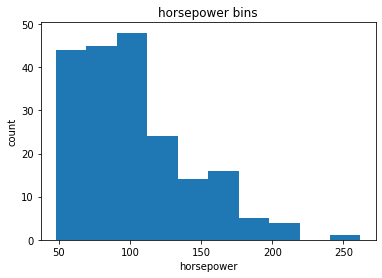

In [26]:
#Plotting a histogram of horsepower to see distribution of horsepower
plt.hist(df["horsepower"])

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

In [27]:
#Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated=4
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
bins, group_names

(array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 ['Low', 'Medium', 'High'])

In [28]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [29]:
#number of vehicles in each bin
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

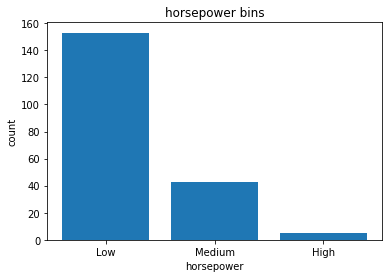

In [32]:
#plotting the distribution for each bin
%matplotlib inline
plt.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

<h4 id="indicator">Indicator variable (or dummy variable)</h4>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>
<p>
    So we can use categorical variables for regression analysis.
</p>

In [36]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head(5)

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset.

In [37]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,Low,0,1


In [38]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

In [ ]:
df.head()

<h2> Data Analysis and Visualization </h2>

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>


In [39]:
# list the data types for each column
print(df.dtypes)

symboling               int64
normalized-losses       int32
make                   object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm              float64
city-L/100km          float64
highway-L/100km       float64
price                 float64
horsepower-binned    category
diesel                  uint8
gas                     uint8
dtype: object


Calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [40]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098322,-0.065713,0.037300,0.047885,0.082310,0.241303,-0.241303


The diagonal elements are always one

In [41]:
df[['bore', 'stroke', 'compression-ratio', 'horsepower', 'price']].corr()

,bore,stroke,compression-ratio,horsepower,price
bore,1.000000,-0.055390,0.001263,0.566903,0.543155
stroke,-0.055390,1.000000,0.187923,0.098322,0.082310
compression-ratio,0.001263,0.187923,1.000000,-0.214489,0.071107
horsepower,0.566903,0.098322,-0.214489,1.000000,0.809607
price,0.543155,0.082310,0.071107,0.809607,1.000000


<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

(0.0, 53358.35535762735)

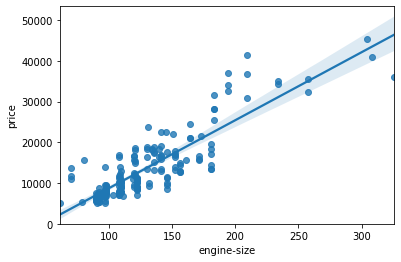

In [56]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [58]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

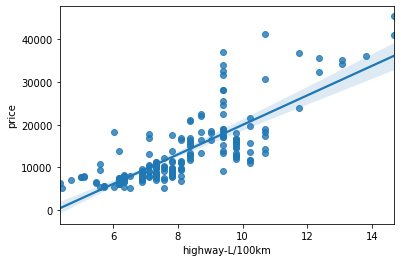

In [59]:
# plotting highway-L/100km as a potential predictor for price
sns.regplot(x="highway-L/100km", y="price", data=df)

As the highway-L/100km goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

We can examine the correlation between 'highway-L/100km' and 'price' and see it's approximately  0.8


In [60]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

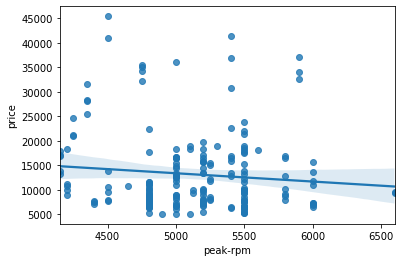

In [61]:
#let's see if "peak-rpm" as a predictor variable of "price"
sns.regplot(x="peak-rpm", y="price", data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

In [62]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 

<AxesSubplot:xlabel='stroke', ylabel='price'>

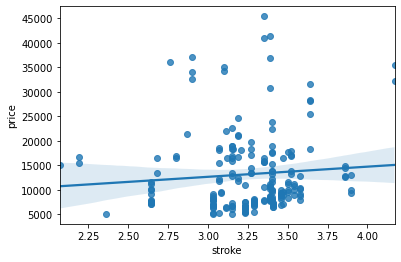

In [63]:
#Checking stroke as a predictor of price
sns.regplot(x = "stroke", y = "price", data = df)

In [64]:
df[["stroke","price"]].corr() 

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


Thus, stroke size is not a good predictor of price

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

Let's look at the relationship between "body-style" and "price".

In [ ]:
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price. Let's examine engine "engine-location" and "price".

<AxesSubplot:xlabel='engine-location', ylabel='price'>

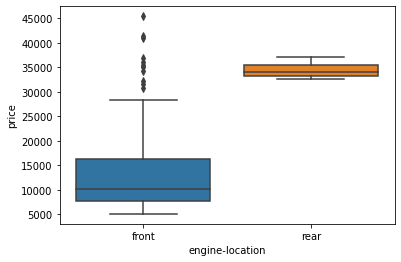

In [65]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

let's examine "drive-wheels" and "price".


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

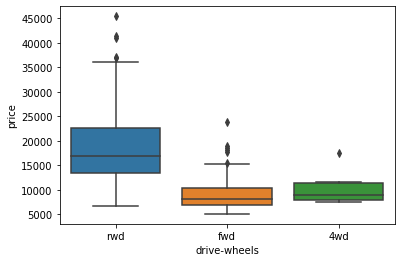

In [66]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data=df)

Here we see that the distribution of price between the different drive-wheels categories differs; as such drive-wheels could potentially be a predictor of price.

<h3 id="discriptive_statistics">Descriptive Statistical Analysis</h3>

In [67]:
#printing the statistical summary for continuos variables
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256904,10.164279,103.402985,5117.665368,9.944145,8.044957,13207.129353,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.319256,4.004965,37.365650,478.113805,2.534599,1.840739,7947.066342,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,4.351852,5118.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,6.911765,7775.000000,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,9.791667,7.833333,10295.000000,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,9.400000,16500.000000,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,18.076923,14.687500,45400.000000,1.000000,1.000000


In [68]:
# statistical summary categorical variables
#above script ignores variable type object
df.describe(include = "object")

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,2,5,3,2,6,7,8
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,165,115,94,118,198,145,157,92


Value-counts is a good way of understanding how many units of each characteristic/variable we have.

In [69]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [70]:
#converting pandas series to pandas dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [71]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

<h4 id="Grouping">Grouping</h2>

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.


In [72]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [73]:
df_group = df[['drive-wheels','body-style','price']]

#grouping results
df_group_one = df_group.groupby(['drive-wheels'], as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price

let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'.

In [74]:
df_group['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [75]:
df_group_two = df_group.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, we will leave the drive-wheel variable as the rows of the table, and pivot body-style to become the columns of the table:

In [76]:
grouped_pivot = df_group_two.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [77]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [78]:
df_group_three = df_group.groupby(['body-style'], as_index = False).mean()
df_group_three

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


<h4>Heat Map: Drive Wheels and Body Style vs Price</h4>

Let's use a heat map to visualize the relationship between Body Style vs Price.

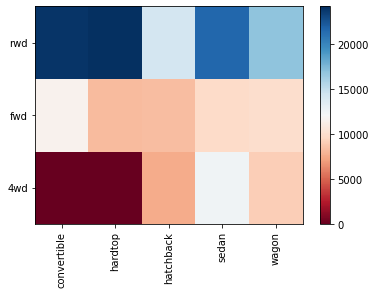

In [79]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3> Correlation and Causation </h3>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.
    
Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [80]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075810,0.279740,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217300,0.239543,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371178,-0.360305,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579795,-0.285970,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615056,-0.245800,0.673363,0.736728,0.751265,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087001,-0.309974,0.003811,0.084301,0.135486,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757981,-0.279361,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822668,-0.256733,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,0.559112,0.543155,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098322,-0.065713,0.037300,0.047885,0.082310,0.241303,-0.241303


<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [81]:
from scipy import stats    

In [82]:
list_var = ['wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'city-L/100km', 'highway-L/100km']
for var in list_var:
    pearson_coef, p_value = stats.pearsonr(df[var], df['price'])
    print("{} \n Pearson Coefficient: {}, P-Value: {}".format(
        var, pearson_coef, p_value))
    

wheel-base 
 Pearson Coefficient: 0.584641822265508, P-Value: 8.076488270733218e-20
horsepower 
 Pearson Coefficient: 0.8096068016571054, P-Value: 6.273536270650504e-48
length 
 Pearson Coefficient: 0.6906283804483639, P-Value: 8.016477466159328e-30
width 
 Pearson Coefficient: 0.7512653440522672, P-Value: 9.20033551048217e-38
curb-weight 
 Pearson Coefficient: 0.8344145257702843, P-Value: 2.189577238894065e-53
engine-size 
 Pearson Coefficient: 0.8723351674455182, P-Value: 9.265491622200232e-64
bore 
 Pearson Coefficient: 0.5431553832626603, P-Value: 8.049189483935261e-17
city-L/100km 
 Pearson Coefficient: 0.7898975136626943, P-Value: 3.903106400939802e-44
highway-L/100km 
 Pearson Coefficient: 0.8011176263981973, P-Value: 3.0467845810415427e-46


Since the p-value < 0.001, the correlation between above variables and price is statistically significant. 
The Pearson coefficient represents how strongly the variables are corelated. 1 being highest positive correlation and -1 being highest negative corelation.


<h3> ANNOVA </h3>

<h4>ANOVA: Analysis of Variance</h4>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

let's see if different types of 'drive-wheels' impact 'price'

In [90]:
grouped_test= df_group_two[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test.head(2)

,drive-wheels,price
0,4wd,7603.000000
1,4wd,12647.333333
3,fwd,11595.000000
4,fwd,8249.000000
8,rwd,23949.600000
9,rwd,24202.714286


In [87]:
df_group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


we can also obtain the values of the method group using the method "get_group"

In [93]:
grouped_test.get_group('4wd')['price']

0     7603.000000
1    12647.333333
2     9095.750000
Name: price, dtype: float64

lets use function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value

In [96]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 17.54495590883977 , P = 0.0005365411925421271


The F score is large showing strong correlation and P value is almost 0 which implies almost certain statistical significance. But this doesn't mean all three tested groups are all this highly correlated?

In [100]:
#separately : fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 26.75473847377244 , P = 0.0008505298615827271


In [102]:
#separately : 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test.get_group('4wd')['price'], grouped_test.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 13.603994177561603 , P = 0.010228629764546682


In [103]:
#separately: 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test.get_group('4wd')['price'], grouped_test.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  


ANOVA results: F= 0.015958539708919313 , P = 0.9035999352040226


<h3> Conclusion: Important Variables </h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

